In [15]:
import pandas as pd
from pingouin import ttest
import plotly.express as px
from IPython.display import Image

## About the Data:

This file contains data regarding the 1969 and 1970 Vietnam War Draft lottery. 

As the story goes, in order to give everyone a fair chance of being selected for the war, the birthdays of young men born between 1944-1950 were put into capsules, then into a jar, from which the dates were drawn. In total, there were 366 capsules (one for every day of the year). The first number drawn, say September 14th, would get assigned #1. The second number drawn would be assigned #2, and so on...

The men with numbers up to and including #195 were drafted into the war. Some people noticed, however, that men with birthdays late in the year (i.e. June - December) we more likely to be selected (in other words, drew lower numbers) than men with birthdays earlier in the year. The first televised draft was carried out in 1969, and as a result of some of the criticism, the manner in which the drawing was conducted was changed in 1970.

Below, we analyze the data and show that for the 1969 draft lottery, there is a clear trend towards drawing lower numbers for birthdays between June and December. We show that this pattern is highly unlikely to have been a product of pure chance and that other mechanisms were likely at play to cause such a skewed result.

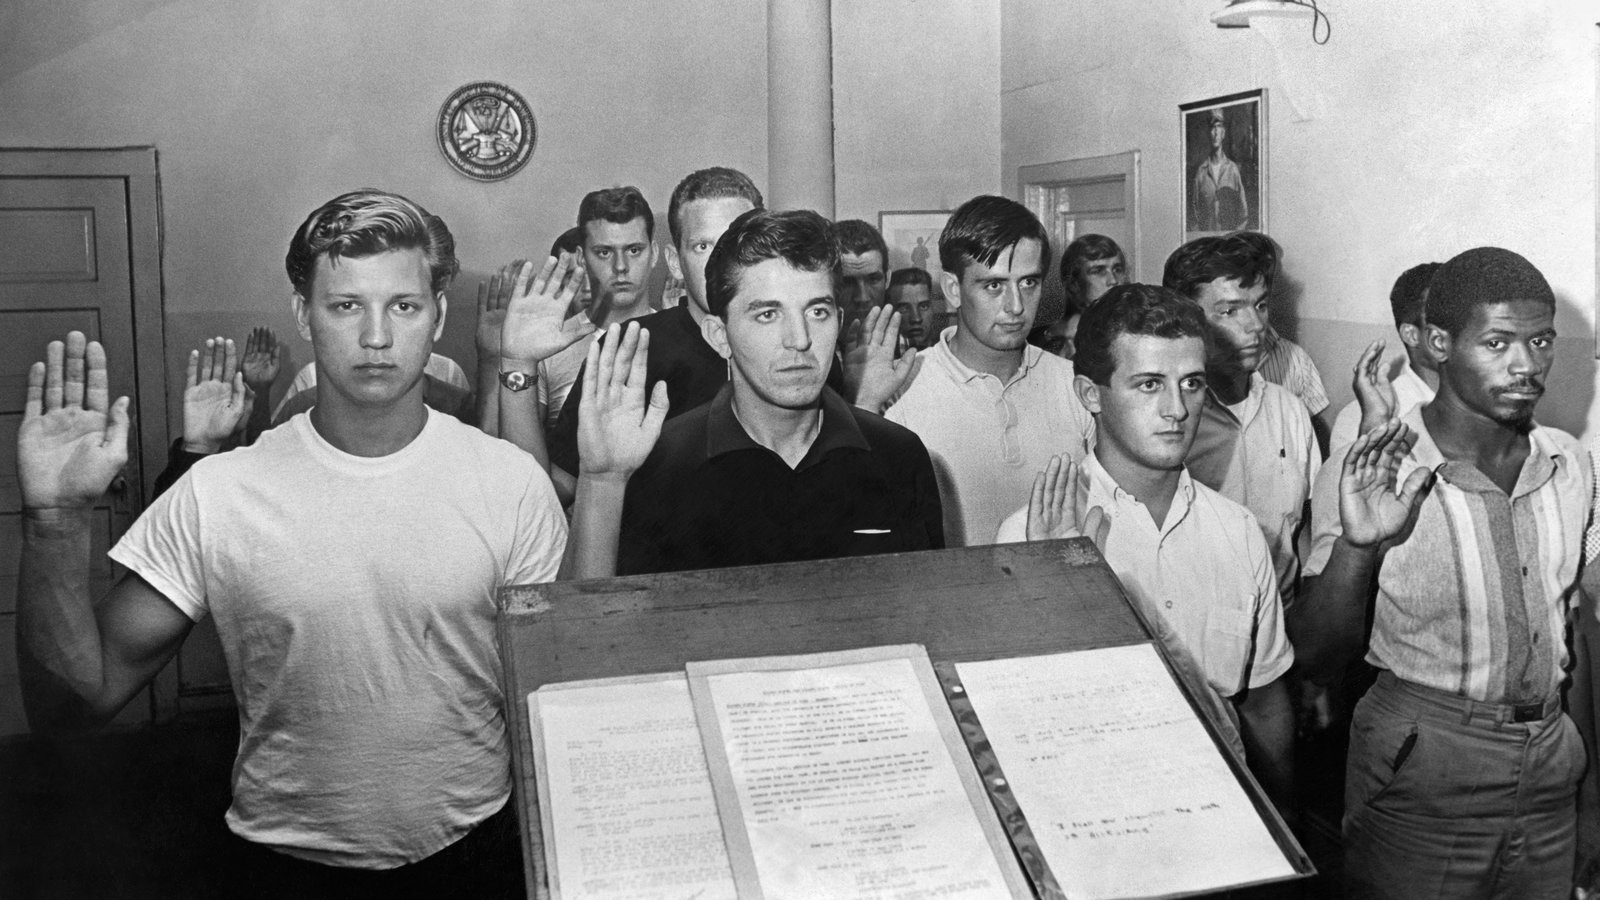

In [23]:
Image(filename='./images/draft_1.png', width=800) 

### Import dataset:

In [2]:
draft_df = pd.read_excel("DraftData.xlsx", sheet_name='data', header=4)

### Drop empty columns:

In [3]:
draft_df.dropna(how='all', axis=1, inplace=True)

In [4]:
draft_df = draft_df.iloc[:,:5]

### Cast date to datetime object, convert months to month name, and rename colums:

In [5]:
draft_df['DATE'] = pd.to_datetime(draft_df['DATE'])
draft_df['Month Name'] = pd.to_datetime(draft_df['Month'], format='%m').dt.month_name()

# set months as catwgorical dtype tp allow sorting and filtering:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
draft_df['Month Name'] = pd.Categorical(draft_df['Month Name'], categories=months, ordered=True)
draft_df.rename(columns={'N69':'1969 drawing', 'N70':'1970 drawing'}, inplace=True)
draft_df

,DATE,Month,Day,1969 drawing,1970 drawing,Month Name
0,1948-01-01,1,1,305,133,January
1,1948-01-02,1,2,159,195,January
2,1948-01-03,1,3,251,336,January
3,1948-01-04,1,4,215,99,January
4,1948-01-05,1,5,101,33,January
...,...,...,...,...,...,...
361,1948-12-27,12,27,78,239,December
362,1948-12-28,12,28,123,128,December
363,1948-12-29,12,29,16,145,December
364,1948-12-30,12,30,3,192,December


### Split dataframes into first and second half of the year:

In [6]:
early_df = draft_df[draft_df['Month Name'] <= 'June']

In [7]:
late_df = draft_df[draft_df['Month Name'] > 'June']

### Capture the monthly means for the drawing (each year):

In [8]:
means = draft_df.groupby('Month Name')[['1969 drawing', '1970 drawing']].mean().reset_index().sort_values('Month Name')
means

,Month Name,1969 drawing,1970 drawing
0,January,201.161290,151.838710
1,February,202.965517,192.034483
2,March,225.806452,179.774194
3,April,203.666667,182.166667
4,May,207.967742,183.516129
5,June,195.733333,194.566667
6,July,181.548387,183.580645
7,August,173.451613,194.354839
8,September,157.300000,209.866667
9,October,182.451613,172.967742


### Plot means over time and compare between the 1969 and 1970 draft:

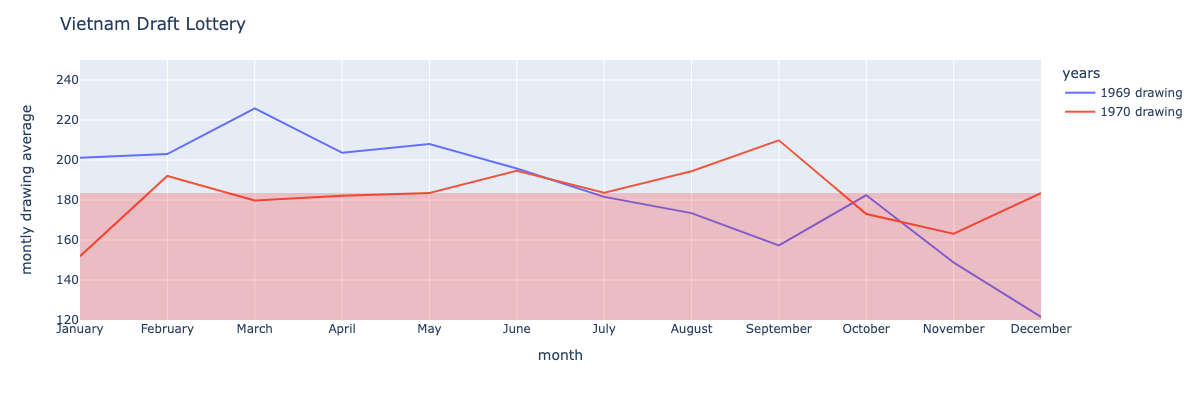

In [25]:
fig = px.line(means, x='Month Name', y=['1969 drawing', '1970 drawing'])
fig.add_hrect(y0=0, y1=183.5, line_width=0, fillcolor="red", opacity=0.2)
fig.update_yaxes(range=[120, 250])
fig.update_layout(
    title="Vietnam Draft Lottery",
    xaxis_title="month",
    yaxis_title="montly drawing average",
    legend_title="years",
    width=1200,
    height=400,
)
Image(filename='./images/lineplot.png', width=1000) 

### Perform two-tailed T-tests in order to ascertain statistical significance between first and second half of the year:

In [10]:
ttest(early_df['1969 drawing'], late_df['1969 drawing'], paired=False, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.195871,362.561839,two-sided,0.000034,"[24.12, 66.68]",0.438775,472.382,0.986993


In [11]:
ttest(early_df['1970 drawing'], late_df['1970 drawing'], paired=False, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.370227,363.200297,two-sided,0.711429,"[-25.87, 17.67]",0.038692,0.123,0.065751


##### As the results above show, the chances of observing the pattern for the 1969 draft lottery were approximately 3 in 100,000 (p-val = 0.000034). Compare that with the pattern and p-value for the 1970 draft, which show that this time, the chances of observing said pattern were approximately 8 in 10.

## So, what happened?

The reason for the disparity between the 1969 and 1970 draft lottery can presumably be attributed to the manner in which the drawing was conducted. 
As the picture below shows, the 1969 drawing was done using a glass cylinder in which the birthdays were placed (contained in capsules). If the capsules were placed into the can in a non-random order, i.e. sequentially, then that would explain why the birthdays from June to December were more likely to be drwan as they would have been place last, and therefore, on top. 

Now, please compare with the image for the 1970 drawing in which the capsules were placed into a drum, which was rotated for an hour before the birthdays were drawn. Moreover, the first birthday drawn did not automatically get assigned #1. Each day from 1-365 (no February 29th in 1970) was also drawn using the same methid, leading to a more fair process.

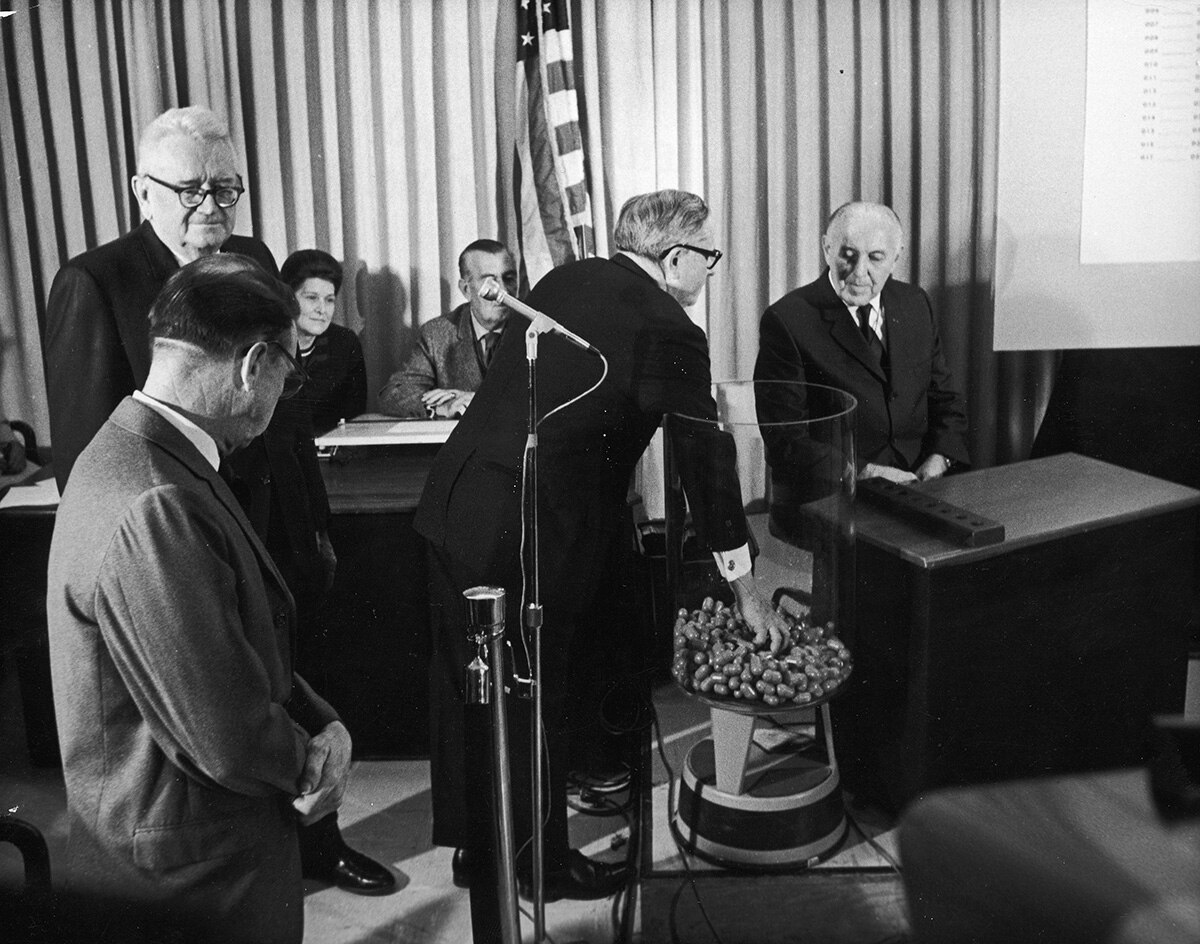

In [21]:
Image(filename='./images/1969_drawing.png', width=800) 

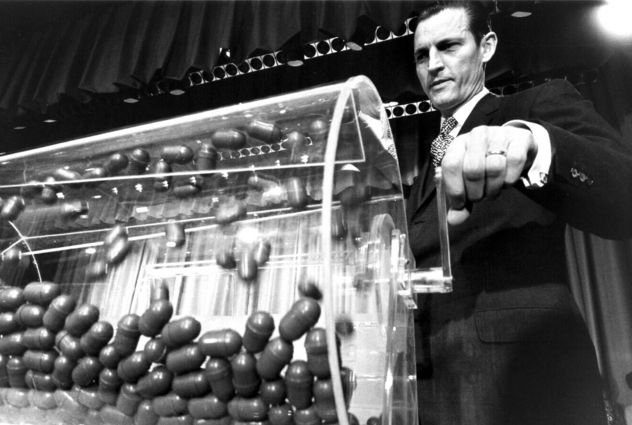

In [22]:
Image(filename='./images/1970_drawing.png', width=800) 